## Redução de Dimensionalidade e Seleção de atributos

Foi visto anteriormente sobre a redução de dimensionalidade, onde algoritmos não-supervisionados (como o PCA) são capazes de condensar informações em um número menor de dimensão. No entanto, uma confusão que normalmente acontece com as terminologias, é a distinção entre selecionar atributos e reduzir dimensionalidade. Obviamente que a seleção de atributos acarretará em um número menor de dimensões, mas diferente da redução de dimensionalidade, a seleção de atributos descarta atributos que não são julgados como relevante para o problema, enquanto a redução condensa a informação em um espaço com menos dimensões.

---

Será utilizado o dataset digits conhecido no meio de aprendizado de máquina, importado diretamente do Scikit-Learn. Em seguida, serão aplicados PCA e seleção de atributos para analisar a diferença entre eles.

In [1]:
from sklearn.decomposition import PCA
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

<Figure size 432x288 with 0 Axes>

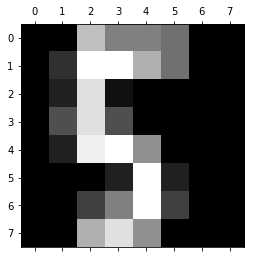

5


In [3]:
import matplotlib.pyplot as plt 
plt.gray()
plt.matshow(digits.images[25]) 
plt.show()
print(digits.target[25])

A função PCA importada de dentro do scikit-learn depende basicamente do atributo n_components. Esse atributo pode ser especificado como um inteiro, onde descreverá o número de componentes desejado, ou um valor contínuo entre 0 e 1, indicando o percentual de variância que deseja ser mantido no resultado final. O parâmetro whiten realiza uma operação matemática no sinal dos vetores extraídos no processo do PCA, e pode melhorar o resultado.

In [28]:
pca = PCA(n_components=0.999, whiten=True)

X_pca = pca.fit_transform(X)

print('Número original de atributos:', X.shape[1])
print('Número reduzido de atributos:', X_pca.shape[1])

Número original de atributos: 64
Número reduzido de atributos: 49


In [29]:
pca.explained_variance_

array([179.0069301 , 163.71774688, 141.78843909, 101.1003752 ,
        69.51316559,  59.10852489,  51.88453911,  44.01510667,
        40.31099529,  37.0117984 ,  28.51904118,  27.32116981,
        21.90148814,  21.32435654,  17.63672222,  16.94686385,
        15.85138991,  15.00446022,  12.23447318,  10.88685932,
        10.69356625,   9.58259779,   9.2264026 ,   8.69036872,
         8.3656119 ,   7.16577961,   6.91973881,   6.19295508,
         5.88499123,   5.1558669 ,   4.49129656,   4.24687799,
         4.04743883,   3.94340334,   3.70647245,   3.53165306,
         3.08457409,   2.73780002,   2.67210896,   2.54170563,
         2.28298744,   1.90724229,   1.81716569,   1.68996439,
         1.4019722 ,   1.29221888,   1.15893419,   0.93122001,
         0.66985059])

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Acurácia nos dados originais:', accuracy_score(y_test, y_pred))

#######

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.33, random_state=42)

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Acurácia nos dados reduzidos (PCA em tudo):', accuracy_score(y_test, y_pred))

#######

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

pca = PCA(n_components=0.95, whiten=True)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('Acurácia nos dados originais (PCA da parte certa):', accuracy_score(y_test, y_pred))

Acurácia nos dados originais: 0.9730639730639731
Acurácia nos dados reduzidos (PCA em tudo): 0.9629629629629629
Acurácia nos dados originais (PCA da parte certa): 0.9612794612794613


In [7]:
import pprint

pprint.pprint(X)

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])


In [8]:
pprint.pprint(X_pca)

array([[-0.09413512,  1.66272073, -0.79471413, ...,  1.39542511,
        -0.37920205, -0.46683784],
       [ 0.59476828, -1.6231603 ,  0.37283291, ...,  0.8297226 ,
        -0.20502869,  0.95368689],
       [ 0.52259074, -0.77810179,  0.24846184, ...,  1.60758693,
         0.86702875,  0.3454214 ],
       ...,
       [ 0.80731022, -0.54397269,  0.47025462, ..., -1.35662732,
         0.73313116,  1.45878179],
       [-0.36415081,  0.97098371, -0.85415667, ...,  1.23674264,
         0.38369172, -0.3870547 ],
       [-0.02574039,  0.49749417,  0.90478379, ..., -1.14667241,
         0.52139579,  1.06686304]])


### Seleção de atributos

A seleção de atributos não é um processo não-supervisionado, igual a redução de dimensionalidade. É feita uma análise diretamente relacionada com o rótulo da amostra, portanto é supervisionado. Uma das estratégias mais comuns de seleção de atributos é teste de valor ANOVA. Esse teste identifica se existe algum valor significamente diferente da relação entre atributo e rótulo. Os atributos que são muito diferentes nessa relação, podem ser descartados.

Lembrando sempre de não dar informações do teste para a seleção de atributos, para não virar um tipo de trapaça.

Número original de atributos: 64
Número reduzido de atributos: 29
[2, 5, 10, 13, 18, 19, 20, 21, 26, 27, 28, 29, 30, 33, 34, 35, 36, 38, 42, 43, 44, 46, 50, 53, 54, 58, 60, 61, 62]


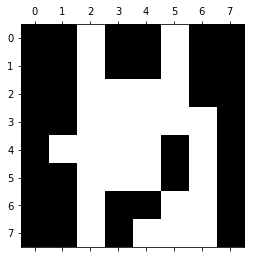

Acurácia nos dados originais: 0.9730639730639731
Acurácia nos dados Kbest: 0.9444444444444444


In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import numpy as np

import warnings
warnings.filterwarnings("ignore")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

fvalue_selector = SelectKBest(f_classif, k=29)
X_kbest = fvalue_selector.fit_transform(X_train, y_train)

print('Número original de atributos:', X.shape[1])
print('Número reduzido de atributos:', X_kbest.shape[1])

###

selected_features = []
map_vector = []
mask = fvalue_selector.get_support()
for m, feature in zip(mask, list(range(64))):
    if m:
        selected_features.append(feature)
        map_vector.append(1)
    else:
        map_vector.append(0)

print(selected_features)

map_vector = np.asarray(map_vector)

plt.matshow(map_vector.reshape(8,8)) 
plt.show()

###

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Acurácia nos dados originais:', accuracy_score(y_test, y_pred))

model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)
model.fit(X_kbest, y_train)
X_test_kbest = fvalue_selector.transform(X_test)
y_pred = model.predict(X_test_kbest)
print('Acurácia nos dados Kbest:', accuracy_score(y_test, y_pred))

In [15]:
pprint.pprint(X_kbest)

array([[ 0.,  0., 16., ...,  0., 15., 13.],
       [ 1.,  0.,  7., ...,  1., 16.,  7.],
       [12., 16., 15., ..., 13., 10.,  0.],
       ...,
       [ 9., 12., 16., ...,  9., 16., 16.],
       [ 1.,  8., 14., ...,  1.,  7.,  0.],
       [ 1.,  1.,  4., ...,  2., 13.,  1.]])


In [16]:
pprint.pprint(X)

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])


Os resultados devem ser comparados entre a acurácia nos dados originais e a acurácia com a redução de dimensionalidade ou com a seleção dos atributos. Além de olhar para os resultados também é importante notar a redução de dimensionalidade, já que isso pode levar a processos mais rápidos.

## Exercícios

(1) Explore as configurações do PCA, utilizando números fixos de componentes e outros valores contínuos para a variância, e verifique se é possível obter melhores resultados utilizando a regressão logística e a separação de dados da forma como está.

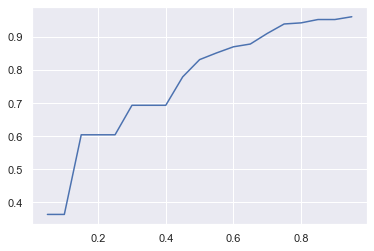

In [14]:
v_hist = []
acc = []
for v in range(1,20):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    pca = PCA(n_components=v*0.05, whiten=True)
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)

    model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    v_hist.append(v*0.05)
    acc.append(accuracy_score(y_test, y_pred))

ax = sns.lineplot(x=np.array(v_hist), y=np.array(acc))

(2) Explore o número de atributos na função KBest, variando sistematicamente, para provar que há ou não há um resultado melhor.

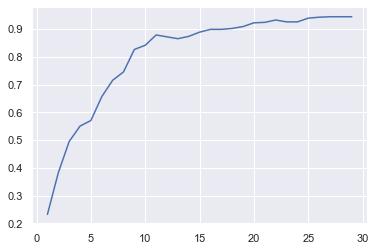

In [15]:
k_hist = []
acc = []

for k in range(1,30):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    fvalue_selector = SelectKBest(f_classif, k=k)
    X_kbest = fvalue_selector.fit_transform(X_train, y_train)

    model = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=2000)
    model.fit(X_kbest, y_train)
    X_test_kbest = fvalue_selector.transform(X_test)
    y_pred = model.predict(X_test_kbest)
    
    k_hist.append(k)
    acc.append(accuracy_score(y_test, y_pred))
    
ax = sns.lineplot(x=np.array(k_hist), y=np.array(acc))

---

**Template para plotar gráfico comparando os resultados, caso queira:**

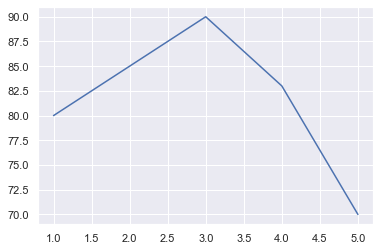

In [12]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np

plot_x = [1,2,3,4,5] # valores que vão no eixo X
plot_y = [80,85,90,83,70] # valores que vão no eixo Y
    
ax = sns.lineplot(x=np.array(plot_x), y=np.array(plot_y))
